In [1]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM6', 9600, timeout=1)
dut.connect(ser)


In [5]:
dut.disconnect()

Serial port disconnected.


In [2]:
dut.power_on()

DAC initialized to a span from 0 V to 5 V


In [3]:
volt_in = np.arange(0.44, 4.0, 0.1)
volt_out_list = []

adc_raw=[]
for addr_fifo in range(12):
    print(addr_fifo, end='->')
    data = dut.calibrate_adc(volt_in, addr_fifo=addr_fifo )
    volt_out_list.append( [dut.adc2volt(d) for d in data] )
    adc_raw.append(data)

0->1->2->3->4->5->6->7->8->9->10->11->

Text(0, 0.5, 'Quality number')

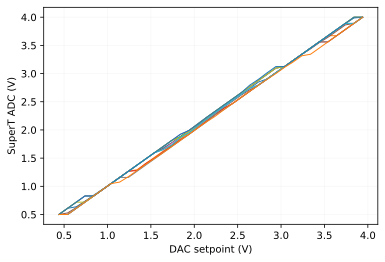

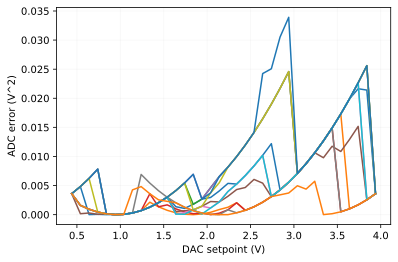

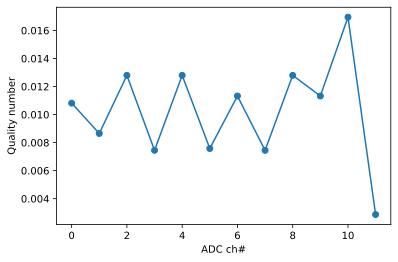

In [4]:
volt_out_list = np.array(volt_out_list)

adc_quality = []

plt.figure(1)
plt.xlabel('DAC setpoint (V)')
plt.ylabel('SuperT ADC (V)')
plt.grid(True, alpha=0.1)

for i, volt_out in enumerate(volt_out_list):
    plt.figure(1)
    plt.plot(volt_in, volt_out, linewidth=1)
    
    voffset=0
    volt_err2 = []
    for vin, vout in zip(volt_in, volt_out):
        volt_err2.append( (vout-vin -voffset)**2 )
    volt_err2 = np.array(volt_err2)
    adc_quality.append( (np.max(volt_err2) - np.min(volt_err2))/2 )
        
    plt.figure(2)
    plt.plot(volt_in, volt_err2)

plt.grid(True, alpha=0.1)
plt.xlabel('DAC setpoint (V)')
plt.ylabel('ADC error (V^2)')
    
plt.figure(3)
plt.plot(range(12), adc_quality, 'o-')
plt.xlabel('ADC ch#')
plt.ylabel('Quality number')

5.00-

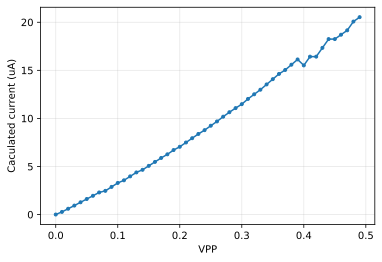

In [7]:
ar=2
r=31
c=0

Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=4) )
    volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

5.00-

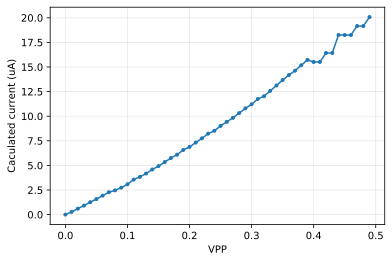

In [15]:
ar=2
r=31
c=0
# ar=1
# r=3
# c=63


Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1) )
    volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

In [55]:
Gmap = a0.pic_read_batch(1, gain=3)

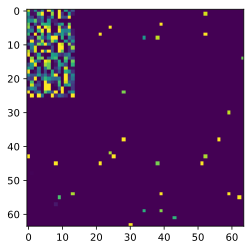

In [56]:
plt.imshow(Gmap)

In [16]:
adc_raw = a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1, raw=True)
print(f'{result:013b}')

volt = dut.adc2volt(adc_raw)
print(f'{volt:.4f} V')

gain = adc_raw >> 10
print(f'gain = {gain:d}')

curr = a0.adc2current(adc_raw, 0.5)
print(f'curr = {curr*1e6:.4f} uA')

0100010110000
1.1022 V
gain = 2
curr = 20.0717 uA


In [17]:
adc_raw = a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1, raw=True)
print(f'{result:013b}')

volt = dut.adc2volt(adc_raw)
print(f'{volt:.4f} V')

gain = adc_raw >> 10
print(f'gain = {gain:d}')

curr = a0.adc2current(adc_raw, 0.5)
print(f'curr = {curr*1e6:.4f} uA')

0100010110000
1.1022 V
gain = 2
curr = 20.0717 uA


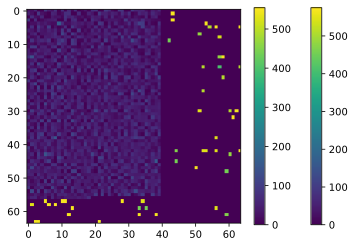

In [21]:
arr = 1
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap1 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap1[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1)
plt.colorbar()

arr = 2
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2)
plt.colorbar()

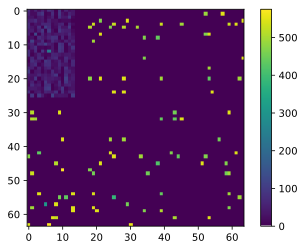

In [22]:
plt.imshow(Gmap1)
plt.colorbar()

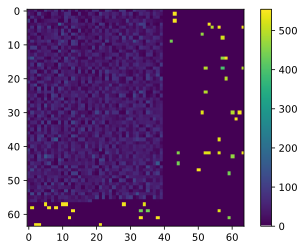

In [23]:
plt.imshow(Gmap2)
plt.colorbar()

In [44]:
Gmap1[25,0:14]

array([  1.09481916,  91.23492994,   0.        ,  95.79667644,
        43.36510264,   8.70723363,   0.        , 109.48191593,
        30.10752688,  37.6344086 ,  34.55522972,  30.44965787,
         1.36852395,  95.79667644])

In [49]:
Gmap2[56,0:40]

array([20.86999022, 54.74095797, 58.76099707, 15.05376344, 28.91006843,
       51.23411535,  0.        , 65.43255132, 16.42228739, 33.18670577,
       18.13294233, 40.3714565 , 40.54252199, 39.00293255, 36.26588465,
       48.75366569, 37.54887586, 45.76001955, 77.54969045,  2.18963832,
        0.        ,  1.09481916,  0.        ,  0.        ,  1.71065494,
        1.64222874,  0.        ,  2.18963832,  1.23167155,  1.64222874,
        1.77908113,  1.64222874,  0.82111437,  0.54740958,  0.54740958,
        1.16324536,  0.54740958,  0.54740958,  2.7370479 ,  0.        ])

Working on array 1 , device (row= 0 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 1 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 2 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 3 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 4 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 5 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 6 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 7 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 8 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 9 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.0
Working on array 1 , device (row= 10 col= 14 )
Initial G= 0.0 Target G = 5e-06
Final G= 0.

NameError: name 'save_workspace' is not defined

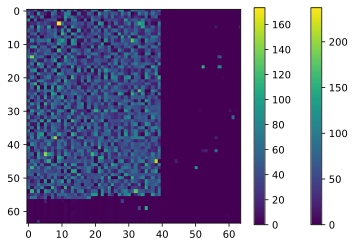

In [50]:
## Reset the stray ON devices in Arrays 1 and 2
VreadGate = 5.0
vRead = 0.2
arr = 1
startRow = 0
startCol = 14
numRows = 64
numCols = 50

thisGtarget = 5e-6
targetRows = np.arange(startRow, startRow+numRows)
targetCols = np.arange(startCol, startCol+numCols)

vAppliedReset = np.arange(0.5, 3.3, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.3e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])

GHistory = []
VHistory = []
for j in range(numCols):
    cc = targetCols[j]
    for i in range(numRows):
        rr = targetRows[i]
        print('Working on array', arr, ', device (row=', rr, 'col=', cc, ')')
        
        thisGHistory = []
        thisVHistory = []
        thisGainHistory = []
        # Do a first read of this device
        for gg in gains:
            #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
            if rdCurr < maxCurr[gg]:
                break
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(0)
        print('Initial G=', currG, 'Target G =', thisGtarget)
        # If device is higher than target, RESET it
        if currG > thisGtarget:
            for vgate in vGateReset:
                for vappreset in vAppliedReset:
                    # Apply vappreset pulse, then read
                    a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)
                    for gg in gains:
                        #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
                        rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                        if rdCurr < maxCurr[gg]:
                            break
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(-1*vappreset)
                    if currG <= thisGtarget:
                        break
                if currG <= thisGtarget:
                    break
        print('Final G=', currG)
        GHistory.append(thisGHistory)
        VHistory.append(thisVHistory)
        
time.sleep(30)

arr = 1
startRow = 26
startCol = 0
numRows = 38
numCols = 14

thisGtarget = 5e-6
targetRows = np.arange(startRow, startRow+numRows)
targetCols = np.arange(startCol, startCol+numCols)

vAppliedReset = np.arange(0.5, 3.3, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.3e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])

#GHistory = []
#VHistory = []
for j in range(numCols):
    cc = targetCols[j]
    for i in range(numRows):
        rr = targetRows[i]
        print('Working on array', arr, ', device (row=', rr, 'col=', cc, ')')
        
        thisGHistory = []
        thisVHistory = []
        thisGainHistory = []
        # Do a first read of this device
        for gg in gains:
            #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
            if rdCurr < maxCurr[gg]:
                break
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(0)
        print('Initial G=', currG, 'Target G =', thisGtarget)
        # If device is higher than target, RESET it
        if currG > thisGtarget:
            for vgate in vGateReset:
                for vappreset in vAppliedReset:
                    # Apply vappreset pulse, then read
                    a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)
                    for gg in gains:
                        #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
                        rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                        if rdCurr < maxCurr[gg]:
                            break
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(-1*vappreset)
                    if currG <= thisGtarget:
                        break
                if currG <= thisGtarget:
                    break
        print('Final G=', currG)
        GHistory.append(thisGHistory)
        VHistory.append(thisVHistory)
        
#Now Reset devices in array 2

VreadGate = 5.0
vRead = 0.2
arr = 2
startRow = 0
startCol = 40
numRows = 64
numCols = 24

thisGtarget = 5e-6
targetRows = np.arange(startRow, startRow+numRows)
targetCols = np.arange(startCol, startCol+numCols)

vAppliedReset = np.arange(0.5, 3.3, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.3e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])

GHistory2 = []
VHistory2 = []
for j in range(numCols):
    cc = targetCols[j]
    for i in range(numRows):
        rr = targetRows[i]
        print('Working on array', arr, ', device (row=', rr, 'col=', cc, ')')
        
        thisGHistory = []
        thisVHistory = []
        thisGainHistory = []
        # Do a first read of this device
        for gg in gains:
            #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
            if rdCurr < maxCurr[gg]:
                break
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(0)
        print('Initial G=', currG, 'Target G =', thisGtarget)
        # If device is higher than target, RESET it
        if currG > thisGtarget:
            for vgate in vGateReset:
                for vappreset in vAppliedReset:
                    # Apply vappreset pulse, then read
                    a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)
                    for gg in gains:
                        #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
                        rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                        if rdCurr < maxCurr[gg]:
                            break
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(-1*vappreset)
                    if currG <= thisGtarget:
                        break
                if currG <= thisGtarget:
                    break
        print('Final G=', currG)
        GHistory2.append(thisGHistory)
        VHistory2.append(thisVHistory)
        
time.sleep(30)

arr = 2
startRow = 57
startCol = 0
numRows = 7
numCols = 40

thisGtarget = 5e-6
targetRows = np.arange(startRow, startRow+numRows)
targetCols = np.arange(startCol, startCol+numCols)

vAppliedReset = np.arange(0.5, 3.3, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.3e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])

#GHistory = []
#VHistory = []
for j in range(numCols):
    cc = targetCols[j]
    for i in range(numRows):
        rr = targetRows[i]
        print('Working on array', arr, ', device (row=', rr, 'col=', cc, ')')
        
        thisGHistory = []
        thisVHistory = []
        thisGainHistory = []
        # Do a first read of this device
        for gg in gains:
            #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
            if rdCurr < maxCurr[gg]:
                break
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(0)
        print('Initial G=', currG, 'Target G =', thisGtarget)
        # If device is higher than target, RESET it
        if currG > thisGtarget:
            for vgate in vGateReset:
                for vappreset in vAppliedReset:
                    # Apply vappreset pulse, then read
                    a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)
                    for gg in gains:
                        #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
                        rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                        if rdCurr < maxCurr[gg]:
                            break
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(-1*vappreset)
                    if currG <= thisGtarget:
                        break
                if currG <= thisGtarget:
                    break
        print('Final G=', currG)
        GHistory2.append(thisGHistory)
        VHistory2.append(thisVHistory)
        
#Now read the arrays   
time.sleep(30)

arr = 1
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap1post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap1post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1post)
plt.colorbar()

arr = 2
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap2post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap2post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2post)
plt.colorbar()

time.sleep(30)
save_workspace(vars(), note='Prober1_ResetStrays')

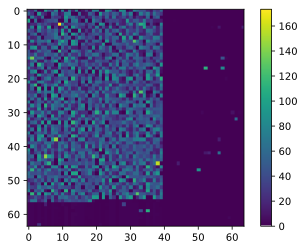

In [57]:
plt.imshow(Gmap2post)
plt.colorbar()

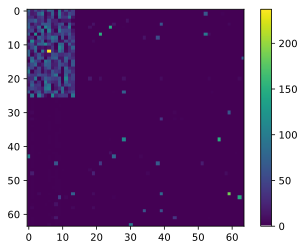

In [58]:
plt.imshow(Gmap1post)
plt.colorbar()

In [59]:
from lib_data import *
save_workspace(vars(), note='Prober1_ResetStrays')

Saving In(<class 'list'>), Out(<class 'dict'>), PIC_PINS(<class 'dict'>), DAC_CH(<class 'dict'>), DAC_SPAN(<class 'dict'>), REFCLKO(<class 'dict'>), volt_in(<class 'numpy.ndarray'>), volt_out_list(<class 'numpy.ndarray'>), adc_raw(<class 'int'>), addr_fifo(<class 'int'>), data(<class 'list'>), adc_quality(<class 'list'>), i(<class 'int'>), volt_out(<class 'numpy.ndarray'>), voffset(<class 'int'>), volt_err2(<class 'numpy.ndarray'>), vin(<class 'numpy.float64'>), vout(<class 'numpy.float64'>), ar(<class 'int'>), r(<class 'int'>), c(<class 'int'>), Vreads(<class 'numpy.ndarray'>), Vgates(<class 'list'>), volts_set(<class 'list'>), Vgate(<class 'int'>), volts(<class 'list'>), vread(<class 'numpy.float64'>), result(<class 'int'>), volt(<class 'float'>), gain(<class 'int'>), curr(<class 'float'>), arr(<class 'int'>), numRows(<class 'int'>), numCols(<class 'int'>), vRead(<class 'float'>), vReadGate(<class 'float'>), gains(<class 'numpy.ndarray'>), maxCurr(<class 'numpy.ndarray'>), Gmap1(<cla